In [45]:
import numpy as np
import pandas as pd
import ast
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, Lasso
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import warnings
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import os
import joblib
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.nn import functional as F

In [3]:
df = pd.read_csv('Final_project_finished_Continents.csv')  # index=False avoids saving row indices

In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'player_id', 'name', 'full_name',
       'height_cm', 'weight_kg', 'dob', 'positions', 'preferred_foot',
       'body_type', 'club_id', 'club_name', 'club_league_id',
       'club_league_name', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'fk_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'defensive_awareness',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'nation_Club/Nation',
       'nation_Career_length', 'nation_Start_year_final',
       'nation_End/Recent_year_final', 'league_Club/Nation',
       'league_Career_length', 'league_Start_year_final',
       'league_End/Recent_year_fi

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18608 entries, 0 to 18607
Data columns (total 98 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0.1                  18608 non-null  int64  
 1   Unnamed: 0                    18608 non-null  int64  
 2   player_id                     18608 non-null  int64  
 3   name                          18608 non-null  object 
 4   full_name                     18608 non-null  object 
 5   height_cm                     18608 non-null  int64  
 6   weight_kg                     18608 non-null  int64  
 7   dob                           18608 non-null  object 
 8   positions                     18608 non-null  object 
 9   preferred_foot                18608 non-null  object 
 10  body_type                     18608 non-null  object 
 11  club_id                       18608 non-null  int64  
 12  club_name                     18608 non-null  object 
 13  c

# Feature Engineering

# Explain the feature engineering section here

In [47]:
def create_derived_features(df):

    df_new = df.copy()
    

    df_new['speed_strength_ratio'] = df_new['sprint_speed'] / (df_new['strength'] + 0.1)  # Add small constant to avoid division by zero
    df_new['agility_height_ratio'] = df_new['agility'] / (df_new['height_cm'] + 0.1)
    df_new['jumping_height_ratio'] = df_new['jumping'] / (df_new['height_cm'] + 0.1)
    df_new['stamina_weight_ratio'] = df_new['stamina'] / (df_new['weight_kg'] + 0.1)
    

    df_new['offensive_skills'] = (df_new['finishing'] + df_new['shot_power'] + 
                                  df_new['long_shots'] + df_new['positioning'] + 
                                  df_new['volleys']) / 5
    
    df_new['defensive_skills'] = (df_new['defensive_awareness'] + df_new['standing_tackle'] + 
                                 df_new['sliding_tackle'] + df_new['interceptions']) / 4
    
    df_new['playmaking_skills'] = (df_new['short_passing'] + df_new['long_passing'] + 
                                   df_new['vision'] + df_new['ball_control']) / 4
    
    df_new['physical_dominance'] = (df_new['strength'] + df_new['aggression'] + 
                                    df_new['jumping']) / 3
    
    df_new['technical_ability'] = (df_new['dribbling'] + df_new['ball_control'] + 
                                  df_new['curve'] + df_new['fk_accuracy']) / 4
    
    df_new['speed_composite'] = (df_new['acceleration'] + df_new['sprint_speed'] + 
                                df_new['agility']) / 3
    

    df_new['goalkeeper_skills'] = (df_new['gk_diving'] + df_new['gk_handling'] + 
                                  df_new['gk_kicking'] + df_new['gk_positioning'] + 
                                  df_new['gk_reflexes']) / 5

    df_new['offensive_defensive_diff'] = df_new['offensive_skills'] - df_new['defensive_skills']
    df_new['offensive_defensive_ratio'] = df_new['offensive_skills'] / (df_new['defensive_skills'] + 0.1)
    df_new['technical_physical_ratio'] = df_new['technical_ability'] / (df_new['physical_dominance'] + 0.1)
    

    df_new['pressure_handling'] = (df_new['composure'] + df_new['reactions'] + df_new['balance']) / 3
    
    return df_new

# Trying Logistic Regression

## State why we didnt go with logistis regression

Although it gives better performance metrics, when testing player data present in our data set, it does not give suitable position recommendations, to match.

In [25]:
numerical_cols = [
    "height_cm",
    "weight_kg",
    "crossing",
    "finishing",
    "heading_accuracy",
    "short_passing",
    "volleys",
    "dribbling",
    "curve",
    "fk_accuracy",
    "long_passing",
    "ball_control",
    "acceleration",
    "sprint_speed",
    "agility",
    "reactions",
    "balance",
    "shot_power",
    "jumping",
    "stamina",
    "strength",
    "long_shots",
    "aggression",
    "interceptions",
    "positioning",
    "vision",
    "penalties",
    "composure",
    "defensive_awareness",
    "standing_tackle",
    "sliding_tackle",
    "gk_diving",
    "gk_handling",
    "gk_kicking",
    "gk_positioning",
    "gk_reflexes",
    "age",
    "speed_strength_ratio",
    "agility_height_ratio",
    "jumping_height_ratio",
    "stamina_weight_ratio",
    "offensive_skills",
    "defensive_skills",
    "playmaking_skills",
    "physical_dominance",
    "technical_ability",
    "speed_composite",
    "goalkeeper_skills",
    "offensive_defensive_diff",
    "offensive_defensive_ratio",
    "technical_physical_ratio",
    "pressure_handling"
]





inputs = df[numerical_cols]

positions = ["ST", "RWB", "RW", "RM", "RB", "LWB", "LW", "LM", "LB", "GK", "CM", "CF", "CDM", "CB", "CAM"]

models_dict = {}
selected_features_dict = {}
pca_dict = {}




for pos in positions:
    print(f"Training model for {pos}...")
    target = df[pos]

    X = inputs.values
    y = target.values

    #Apply Sclaing========================================================================================
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    #Apply smote========================================================================================
    sm = SMOTE(random_state=2)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

    #Apply PCA========================================================================================
    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train_res)
    X_test_pca = pca.transform(X_test)
    
    pca_dict[pos] = pca  # Store PCA model for later use

    #Apply Feature extraction, so  RFE and LASSO========================================================================================
    log_reg_rfe = LogisticRegression(class_weight='balanced', random_state=2, max_iter=1000)
    rfe = RFE(estimator=log_reg_rfe, n_features_to_select=15)
    X_train_pca_rfe = rfe.fit_transform(X_train_pca, y_train_res)

    
    lasso = Lasso(alpha=0.01)
    lasso.fit(X_train_pca, y_train_res)

    lasso_importance = np.abs(lasso.coef_)
    selected_features_lasso = np.array([f'PCA_{i+1}' for i in range(len(lasso_importance)) if lasso_importance[i] > 0])

    #Keep only the features present in both the RFE and the LASSO========================================================================================
    final_selected_features = list(set([f'PCA_{i+1}' for i in range(X_train_pca_rfe.shape[1])]) & set(selected_features_lasso))
    print(f"Final Selected Features for {pos}: {final_selected_features}")
    selected_features_dict[pos] = final_selected_features

    # Select features from PCA components
    selected_indices = [int(f.split('_')[1]) - 1 for f in final_selected_features]
    X_train_final = X_train_pca[:, selected_indices]
    X_test_final = X_test_pca[:, selected_indices]

    #Logistic regression starts from here========================================================================================
    log_reg = LogisticRegression(class_weight='balanced', random_state=2, max_iter=1000)

    param_grid_log_reg = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }

    grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid_log_reg, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
    grid_search_log_reg.fit(X_train_final, y_train_res)

    best_log_reg = grid_search_log_reg.best_estimator_
    models_dict[pos] = best_log_reg  # Store trained model

    y_pred_log_reg = best_log_reg.predict(X_test_final)

    print(f'Logistic Regression Performance for {pos}:\n {classification_report(y_test, y_pred_log_reg)}')

    log_reg_auc = roc_auc_score(y_test, y_pred_log_reg)
    print(f'ROC-AUC for {pos}: {log_reg_auc}')

    print(f'Confusion Matrix for {pos}:\n{confusion_matrix(y_test, y_pred_log_reg)}')

    print("\nBest hyperparameters from grid search:", grid_search_log_reg.best_params_)

    # Display coefficients to check that they use the correct number of features, Basically so that the coefficients number matches the features_selected number.
    coefficients = best_log_reg.coef_
    print("Logistic Regression Coefficients:")
    for feature, coef in zip(final_selected_features, coefficients[0]):
        print(f"{feature}: {coef}")

    print("\nShape of coefficients:", coefficients.shape)

Training model for ST...
Final Selected Features for ST: ['PCA_4', 'PCA_10', 'PCA_6', 'PCA_5', 'PCA_2', 'PCA_1', 'PCA_3']
Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(


Logistic Regression Performance for ST:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96      3097
           1       0.73      0.90      0.81       625

    accuracy                           0.93      3722
   macro avg       0.86      0.92      0.88      3722
weighted avg       0.94      0.93      0.93      3722

ROC-AUC for ST: 0.9157034549564095
Confusion Matrix for ST:
[[2892  205]
 [  64  561]]

Best hyperparameters from grid search: {'C': 0.1, 'solver': 'saga'}
Logistic Regression Coefficients:
PCA_4: -0.9633025335527019
PCA_10: 0.9041962852884181
PCA_6: 0.5386142513867993
PCA_5: -0.11589403728573487
PCA_2: 1.1137125733559115
PCA_1: 0.48622436598524665
PCA_3: 0.6678998497523055

Shape of coefficients: (1, 7)
Training model for RWB...
Final Selected Features for RWB: ['PCA_14', 'PCA_9', 'PCA_4', 'PCA_7', 'PCA_5', 'PCA_11', 'PCA_2', 'PCA_1', 'PCA_13', 'PCA_3']
Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=14. There will be no feature selection and all features will be kept.
  warnings.warn(


Logistic Regression Performance for RWB:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90      3581
           1       0.16      0.90      0.28       141

    accuracy                           0.82      3722
   macro avg       0.58      0.86      0.59      3722
weighted avg       0.96      0.82      0.87      3722

ROC-AUC for RWB: 0.8595978380776399
Confusion Matrix for RWB:
[[2931  650]
 [  14  127]]

Best hyperparameters from grid search: {'C': 0.01, 'solver': 'liblinear'}
Logistic Regression Coefficients:
PCA_14: -0.7125643217173349
PCA_9: 0.21299971690966008
PCA_4: 0.023830658573917383
PCA_7: -1.675611701673382
PCA_5: 0.3936560706719617
PCA_11: -0.5260425514977133
PCA_2: -0.3866248725946376
PCA_1: 0.4058076235569769
PCA_13: 1.2711409030783367
PCA_3: -0.9050658080813421

Shape of coefficients: (1, 10)
Training model for RW...
Final Selected Features for RW: ['PCA_4', 'PCA_8', 'PCA_7', 'PCA_5', 'PCA_6', 'PCA_1', 'PCA_2', 'PCA_3']
F

C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(


Logistic Regression Performance for RW:
               precision    recall  f1-score   support

           0       0.99      0.76      0.86      3522
           1       0.17      0.84      0.28       200

    accuracy                           0.77      3722
   macro avg       0.58      0.80      0.57      3722
weighted avg       0.94      0.77      0.83      3722

ROC-AUC for RW: 0.8021692220329358
Confusion Matrix for RW:
[[2692  830]
 [  32  168]]

Best hyperparameters from grid search: {'C': 0.1, 'solver': 'liblinear'}
Logistic Regression Coefficients:
PCA_4: -0.18505143226404133
PCA_8: -0.6317254794514208
PCA_7: 0.5868045845119065
PCA_5: 0.06430306840771459
PCA_6: -0.2395918422916771
PCA_1: 0.40057038054506344
PCA_2: -0.6444119213211793
PCA_3: 0.07199329818615731

Shape of coefficients: (1, 8)
Training model for RM...
Final Selected Features for RM: ['PCA_8', 'PCA_10', 'PCA_7', 'PCA_5', 'PCA_11', 'PCA_12', 'PCA_6', 'PCA_1', 'PCA_2', 'PCA_3']
Fitting 5 folds for each of 30 candidat

C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(


Logistic Regression Performance for RM:
               precision    recall  f1-score   support

           0       0.96      0.72      0.83      3250
           1       0.30      0.80      0.43       472

    accuracy                           0.73      3722
   macro avg       0.63      0.76      0.63      3722
weighted avg       0.88      0.73      0.78      3722

ROC-AUC for RM: 0.762269882659713
Confusion Matrix for RM:
[[2352  898]
 [  94  378]]

Best hyperparameters from grid search: {'C': 10, 'solver': 'lbfgs'}
Logistic Regression Coefficients:
PCA_8: -0.2879693553610858
PCA_10: -0.19593047895815405
PCA_7: 0.7872714718349152
PCA_5: 0.23992100287551296
PCA_11: -0.4169243271394969
PCA_12: 0.47219096182124237
PCA_6: -0.1406483161932061
PCA_1: 0.31723678957219215
PCA_2: -0.426421821591056
PCA_3: -0.1357426012553223

Shape of coefficients: (1, 10)
Training model for RB...
Final Selected Features for RB: ['PCA_14', 'PCA_4', 'PCA_10', 'PCA_7', 'PCA_5', 'PCA_11', 'PCA_12', 'PCA_6', 'PCA_

C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=14. There will be no feature selection and all features will be kept.
  warnings.warn(


Logistic Regression Performance for RB:
               precision    recall  f1-score   support

           0       0.98      0.81      0.88      3303
           1       0.36      0.84      0.50       419

    accuracy                           0.81      3722
   macro avg       0.67      0.82      0.69      3722
weighted avg       0.91      0.81      0.84      3722

ROC-AUC for RB: 0.8242080498165767
Confusion Matrix for RB:
[[2662  641]
 [  66  353]]

Best hyperparameters from grid search: {'C': 100, 'solver': 'lbfgs'}
Logistic Regression Coefficients:
PCA_14: -0.5812754844594498
PCA_4: 0.2292736859980046
PCA_10: 0.15374971552542266
PCA_7: 1.098709980257254
PCA_5: 0.29471908061529306
PCA_11: -0.8387117646743539
PCA_12: -0.3574530838203042
PCA_6: 0.31371326920041653
PCA_1: 0.27766332796531495
PCA_13: 1.2163723920588523
PCA_2: -0.6888500450694892
PCA_3: -0.9282677885668027

Shape of coefficients: (1, 12)
Training model for LWB...
Final Selected Features for LWB: ['PCA_4', 'PCA_8', 'PCA_7

C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=14. There will be no feature selection and all features will be kept.
  warnings.warn(


Logistic Regression Performance for LWB:
               precision    recall  f1-score   support

           0       0.99      0.81      0.89      3574
           1       0.15      0.84      0.26       148

    accuracy                           0.81      3722
   macro avg       0.57      0.82      0.58      3722
weighted avg       0.96      0.81      0.87      3722

ROC-AUC for LWB: 0.8240672121477941
Confusion Matrix for LWB:
[[2896  678]
 [  24  124]]

Best hyperparameters from grid search: {'C': 100, 'solver': 'sag'}
Logistic Regression Coefficients:
PCA_4: 0.27846359364160395
PCA_8: -0.34296174120424794
PCA_7: 1.9684981639350903
PCA_5: 0.30092229053544695
PCA_11: -0.7118788979930523
PCA_12: 0.6861489624622088
PCA_2: -0.266945936433106
PCA_1: 0.3218834134831041
PCA_13: 1.421645245309806
PCA_3: -0.8510674681674842

Shape of coefficients: (1, 10)
Training model for LW...
Final Selected Features for LW: ['PCA_4', 'PCA_7', 'PCA_6', 'PCA_5', 'PCA_2', 'PCA_1', 'PCA_3']
Fitting 5 folds for

C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(


Logistic Regression Performance for LW:
               precision    recall  f1-score   support

           0       0.99      0.77      0.87      3517
           1       0.18      0.89      0.30       205

    accuracy                           0.78      3722
   macro avg       0.59      0.83      0.59      3722
weighted avg       0.95      0.78      0.84      3722

ROC-AUC for LW: 0.8288896440286552
Confusion Matrix for LW:
[[2708  809]
 [  23  182]]

Best hyperparameters from grid search: {'C': 10, 'solver': 'saga'}
Logistic Regression Coefficients:
PCA_4: -0.42350955954541414
PCA_7: 0.4918060510634536
PCA_6: -0.24847299187177413
PCA_5: 0.00868299745337558
PCA_2: -0.5744434050499193
PCA_1: 0.5300627339446672
PCA_3: 0.0071250745409426955

Shape of coefficients: (1, 7)
Training model for LM...
Final Selected Features for LM: ['PCA_8', 'PCA_7', 'PCA_5', 'PCA_11', 'PCA_6', 'PCA_1', 'PCA_13', 'PCA_2', 'PCA_3']
Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(


Logistic Regression Performance for LM:
               precision    recall  f1-score   support

           0       0.96      0.75      0.84      3224
           1       0.33      0.80      0.47       498

    accuracy                           0.75      3722
   macro avg       0.64      0.78      0.65      3722
weighted avg       0.88      0.75      0.79      3722

ROC-AUC for LM: 0.775055557216459
Confusion Matrix for LM:
[[2408  816]
 [  98  400]]

Best hyperparameters from grid search: {'C': 1, 'solver': 'liblinear'}
Logistic Regression Coefficients:
PCA_8: -0.28890923793677853
PCA_7: 0.9090710111441626
PCA_5: 0.258199096864581
PCA_11: -0.5048502389263426
PCA_6: -0.1465076953840867
PCA_1: 0.34662758503429775
PCA_13: 0.24724717274610863
PCA_2: 0.46896645912691554
PCA_3: -0.1240224661362483

Shape of coefficients: (1, 9)
Training model for LB...
Final Selected Features for LB: ['PCA_4', 'PCA_7', 'PCA_5', 'PCA_11', 'PCA_12', 'PCA_6', 'PCA_1', 'PCA_13', 'PCA_2', 'PCA_3']
Fitting 5 folds

C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=14. There will be no feature selection and all features will be kept.
  warnings.warn(


Logistic Regression Performance for LB:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      3321
           1       0.38      0.83      0.52       401

    accuracy                           0.83      3722
   macro avg       0.68      0.83      0.71      3722
weighted avg       0.91      0.83      0.86      3722

ROC-AUC for LB: 0.8330502410039339
Confusion Matrix for LB:
[[2767  554]
 [  67  334]]

Best hyperparameters from grid search: {'C': 0.1, 'solver': 'liblinear'}
Logistic Regression Coefficients:
PCA_4: 0.388109657604601
PCA_7: 1.8144222997583377
PCA_5: 0.10331762876955845
PCA_11: -1.0266263752205387
PCA_12: -0.5569638805511077
PCA_6: 0.3425527930458156
PCA_1: 0.359818974879366
PCA_13: 0.990822541756477
PCA_2: -0.7169888151624083
PCA_3: -1.1148173415362554

Shape of coefficients: (1, 10)
Training model for GK...
Final Selected Features for GK: ['PCA_4', 'PCA_8', 'PCA_7', 'PCA_5', 'PCA_2', 'PCA_1', 'PCA_3']
Fitting 5 folds for

C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=8. There will be no feature selection and all features will be kept.
  warnings.warn(


Logistic Regression Performance for GK:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3300
           1       1.00      1.00      1.00       422

    accuracy                           1.00      3722
   macro avg       1.00      1.00      1.00      3722
weighted avg       1.00      1.00      1.00      3722

ROC-AUC for GK: 1.0
Confusion Matrix for GK:
[[3300    0]
 [   0  422]]

Best hyperparameters from grid search: {'C': 0.001, 'solver': 'newton-cg'}
Logistic Regression Coefficients:
PCA_4: -0.09284503038412899
PCA_8: -0.035841773019073146
PCA_7: -0.014873708271149831
PCA_5: -0.02804781964717677
PCA_2: 0.04519679409542196
PCA_1: 0.7679964147506901
PCA_3: 0.2391034753567938

Shape of coefficients: (1, 7)
Training model for CM...
Final Selected Features for CM: ['PCA_4', 'PCA_8', 'PCA_10', 'PCA_7', 'PCA_5', 'PCA_11', 'PCA_12', 'PCA_6', 'PCA_1', 'PCA_13', 'PCA_2', 'PCA_3']
Fitting 5 folds for each of 30 candidates, totalling 150

C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(


Logistic Regression Performance for CM:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90      2832
           1       0.65      0.89      0.75       890

    accuracy                           0.86      3722
   macro avg       0.80      0.87      0.83      3722
weighted avg       0.89      0.86      0.86      3722

ROC-AUC for CM: 0.8698283660255188
Confusion Matrix for CM:
[[2397  435]
 [  95  795]]

Best hyperparameters from grid search: {'C': 100, 'solver': 'lbfgs'}
Logistic Regression Coefficients:
PCA_4: 0.7448430990016542
PCA_8: -1.40846158330748
PCA_10: 1.3805534067671221
PCA_7: -1.235739526420836
PCA_5: -1.167492828440184
PCA_11: 0.16980476315879872
PCA_12: 1.381060230298143
PCA_6: -0.26539594849097164
PCA_1: 0.6218589866374513
PCA_13: -0.9562159810167705
PCA_2: 0.060360163419116646
PCA_3: -0.6987450399056571

Shape of coefficients: (1, 12)
Training model for CF...
Final Selected Features for CF: ['PCA_4', 'PCA_6', 'PCA_5', 'PC

C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(


Logistic Regression Performance for CF:
               precision    recall  f1-score   support

           0       0.99      0.74      0.85      3627
           1       0.07      0.79      0.13        95

    accuracy                           0.74      3722
   macro avg       0.53      0.76      0.49      3722
weighted avg       0.97      0.74      0.83      3722

ROC-AUC for CF: 0.7646017442282298
Confusion Matrix for CF:
[[2683  944]
 [  20   75]]

Best hyperparameters from grid search: {'C': 10, 'solver': 'sag'}
Logistic Regression Coefficients:
PCA_4: -0.2888795045795132
PCA_6: -0.2876141692098222
PCA_5: -0.39810216571077894
PCA_2: -0.455332268452337
PCA_1: 0.5789307278958684
PCA_3: 0.11824140083748826

Shape of coefficients: (1, 6)
Training model for CDM...
Final Selected Features for CDM: ['PCA_9', 'PCA_4', 'PCA_8', 'PCA_10', 'PCA_7', 'PCA_5', 'PCA_11', 'PCA_12', 'PCA_2', 'PCA_1', 'PCA_13', 'PCA_3']
Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(


Logistic Regression Performance for CDM:
               precision    recall  f1-score   support

           0       0.97      0.82      0.89      3116
           1       0.49      0.86      0.62       606

    accuracy                           0.83      3722
   macro avg       0.73      0.84      0.76      3722
weighted avg       0.89      0.83      0.85      3722

ROC-AUC for CDM: 0.8429202836843377
Confusion Matrix for CDM:
[[2569  547]
 [  84  522]]

Best hyperparameters from grid search: {'C': 1, 'solver': 'lbfgs'}
Logistic Regression Coefficients:
PCA_9: -0.480395591439131
PCA_4: -0.8134443488596291
PCA_8: -1.3755965445982021
PCA_10: 1.2149885814189982
PCA_7: -1.0659170404277793
PCA_5: -0.9192235294738905
PCA_11: 0.22853923244400925
PCA_12: 1.0201804884801575
PCA_2: 0.7072621160289192
PCA_1: 0.542041993296537
PCA_13: -0.835037976923845
PCA_3: -0.8423080487956892

Shape of coefficients: (1, 12)
Training model for CB...
Final Selected Features for CB: ['PCA_9', 'PCA_4', 'PCA_8', 'P

C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(


Logistic Regression Performance for CB:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      2917
           1       0.77      0.92      0.84       805

    accuracy                           0.92      3722
   macro avg       0.87      0.92      0.89      3722
weighted avg       0.93      0.92      0.93      3722

ROC-AUC for CB: 0.9220887621716347
Confusion Matrix for CB:
[[2698  219]
 [  65  740]]

Best hyperparameters from grid search: {'C': 0.1, 'solver': 'liblinear'}
Logistic Regression Coefficients:
PCA_9: -0.8912327050543131
PCA_4: 0.31139396882945614
PCA_8: 0.4096795003521616
PCA_7: -0.14924457254409193
PCA_11: -0.15562102411967046
PCA_2: -1.8285351099366447
PCA_1: -0.23066217858653632
PCA_13: -0.9588131631407987
PCA_3: -0.3082444173422799

Shape of coefficients: (1, 9)
Training model for CAM...
Final Selected Features for CAM: ['PCA_9', 'PCA_4', 'PCA_8', 'PCA_10', 'PCA_5', 'PCA_12', 'PCA_6', 'PCA_1', 'PCA_2', 'PCA_3']
Fitting

C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(


Logistic Regression Performance for CAM:
               precision    recall  f1-score   support

           0       0.97      0.76      0.85      3269
           1       0.33      0.85      0.47       453

    accuracy                           0.77      3722
   macro avg       0.65      0.81      0.66      3722
weighted avg       0.90      0.77      0.81      3722

ROC-AUC for CAM: 0.8050635544147746
Confusion Matrix for CAM:
[[2478  791]
 [  67  386]]

Best hyperparameters from grid search: {'C': 0.01, 'solver': 'liblinear'}
Logistic Regression Coefficients:
PCA_9: -0.38211516304592735
PCA_4: 0.3107367677618033
PCA_8: -0.6583524483701658
PCA_10: -0.5380760999215928
PCA_5: -0.6530070593594175
PCA_12: 0.6068486236901354
PCA_6: -0.2837697584585945
PCA_1: 0.4274812395283962
PCA_2: -0.4989888149652209
PCA_3: 0.02874749586636275

Shape of coefficients: (1, 10)


# Trying RandomForest and XGBoost models


=== Training model for ST ===
Selected Features for ST: ['PCA_4', 'PCA_10', 'PCA_6', 'PCA_5', 'PCA_2', 'PCA_1', 'PCA_3']
Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(


[RandomForest] AUC for ST: 0.9079444623829512
Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:04:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[XGBoost] AUC for ST: 0.9080625121084921
 XGBoost selected for ST
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      3097
           1       0.75      0.87      0.81       625

    accuracy                           0.93      3722
   macro avg       0.86      0.91      0.88      3722
weighted avg       0.94      0.93      0.93      3722

Confusion Matrix:
 [[2919  178]
 [  79  546]]

Feature importances for ST:
   Feature  Importance
4   PCA_2    0.454574
5   PCA_1    0.205265
6   PCA_3    0.159964
0   PCA_4    0.054234
3   PCA_5    0.046488
2   PCA_6    0.040913
1  PCA_10    0.038562


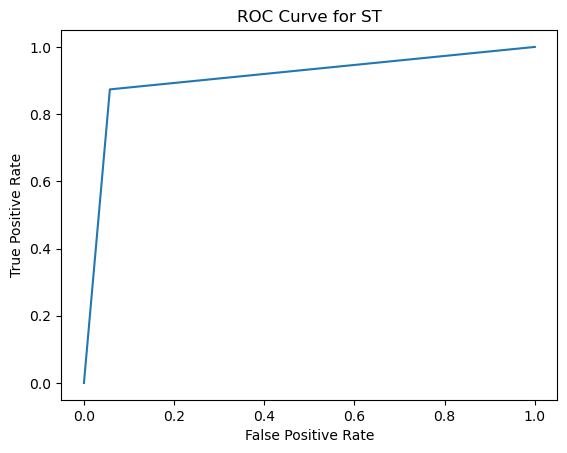


=== Training model for RWB ===
Selected Features for RWB: ['PCA_14', 'PCA_9', 'PCA_4', 'PCA_7', 'PCA_5', 'PCA_11', 'PCA_2', 'PCA_1', 'PCA_13', 'PCA_3']
Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=14. There will be no feature selection and all features will be kept.
  warnings.warn(


[RandomForest] AUC for RWB: 0.6804569427692649
Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:05:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[XGBoost] AUC for RWB: 0.7137948312706344
 XGBoost selected for RWB
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      3581
           1       0.21      0.50      0.29       141

    accuracy                           0.91      3722
   macro avg       0.59      0.71      0.62      3722
weighted avg       0.95      0.91      0.93      3722

Confusion Matrix:
 [[3309  272]
 [  70   71]]

Feature importances for RWB:
   Feature  Importance
9   PCA_3    0.186947
6   PCA_2    0.149148
3   PCA_7    0.125593
4   PCA_5    0.108010
7   PCA_1    0.107852
8  PCA_13    0.099934
5  PCA_11    0.064845
2   PCA_4    0.061394
0  PCA_14    0.050107
1   PCA_9    0.046171


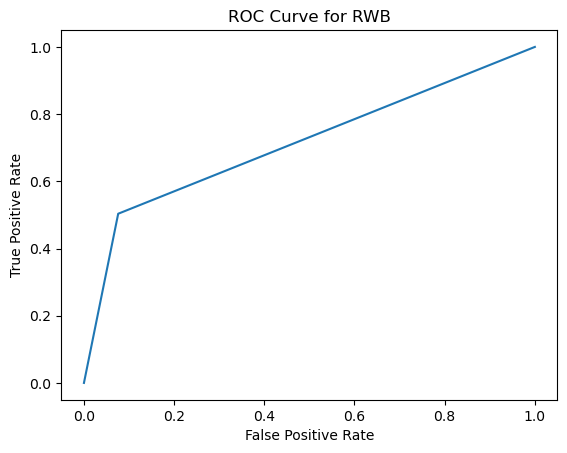


=== Training model for RW ===
Selected Features for RW: ['PCA_4', 'PCA_8', 'PCA_7', 'PCA_5', 'PCA_6', 'PCA_1', 'PCA_2', 'PCA_3']
Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(


[RandomForest] AUC for RW: 0.7144605337876208
Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:05:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[XGBoost] AUC for RW: 0.7327086882453152
 XGBoost selected for RW
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      3522
           1       0.20      0.60      0.30       200

    accuracy                           0.85      3722
   macro avg       0.59      0.73      0.61      3722
weighted avg       0.93      0.85      0.88      3722

Confusion Matrix:
 [[3048  474]
 [  80  120]]

Feature importances for RW:
   Feature  Importance
6   PCA_2    0.309432
5   PCA_1    0.216055
7   PCA_3    0.128420
3   PCA_5    0.075840
0   PCA_4    0.071177
2   PCA_7    0.069689
1   PCA_8    0.064919
4   PCA_6    0.064469


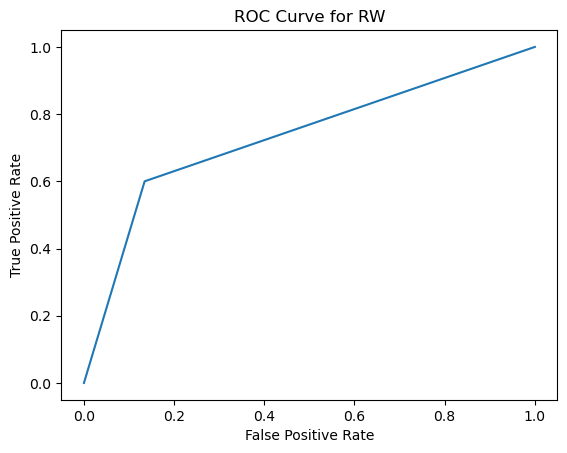


=== Training model for RM ===
Selected Features for RM: ['PCA_8', 'PCA_10', 'PCA_7', 'PCA_5', 'PCA_11', 'PCA_12', 'PCA_6', 'PCA_1', 'PCA_2', 'PCA_3']
Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(


[RandomForest] AUC for RM: 0.7274146023468058
Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:06:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[XGBoost] AUC for RM: 0.7244471968709256
 RandomForest selected for RM
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      3250
           1       0.39      0.59      0.47       472

    accuracy                           0.83      3722
   macro avg       0.66      0.73      0.68      3722
weighted avg       0.87      0.83      0.84      3722

Confusion Matrix:
 [[2814  436]
 [ 194  278]]

Feature importances for RM:
   Feature  Importance
8   PCA_2    0.205610
7   PCA_1    0.202894
9   PCA_3    0.099742
2   PCA_7    0.084577
3   PCA_5    0.078842
6   PCA_6    0.067597
4  PCA_11    0.067165
5  PCA_12    0.065087
0   PCA_8    0.064747
1  PCA_10    0.063738


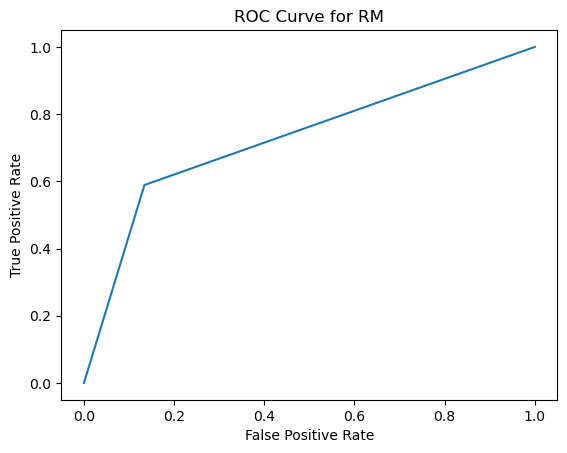


=== Training model for RB ===
Selected Features for RB: ['PCA_14', 'PCA_4', 'PCA_10', 'PCA_7', 'PCA_5', 'PCA_11', 'PCA_12', 'PCA_6', 'PCA_1', 'PCA_13', 'PCA_2', 'PCA_3']
Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=14. There will be no feature selection and all features will be kept.
  warnings.warn(


[RandomForest] AUC for RB: 0.7404579766567893
Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:07:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[XGBoost] AUC for RB: 0.763274436994791
 XGBoost selected for RB
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3303
           1       0.40      0.65      0.50       419

    accuracy                           0.85      3722
   macro avg       0.68      0.76      0.70      3722
weighted avg       0.89      0.85      0.87      3722

Confusion Matrix:
 [[2898  405]
 [ 147  272]]

Feature importances for RB:
    Feature  Importance
10   PCA_2    0.276009
11   PCA_3    0.158166
4    PCA_5    0.076876
9   PCA_13    0.074623
5   PCA_11    0.071787
8    PCA_1    0.064946
3    PCA_7    0.055865
6   PCA_12    0.048463
1    PCA_4    0.045325
2   PCA_10    0.044335
7    PCA_6    0.042029
0   PCA_14    0.041576


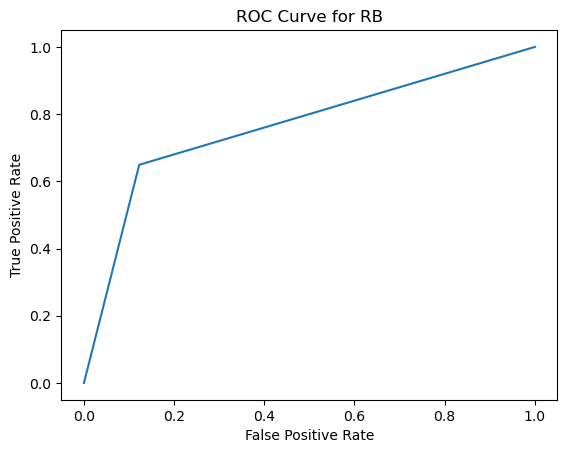


=== Training model for LWB ===
Selected Features for LWB: ['PCA_4', 'PCA_8', 'PCA_7', 'PCA_5', 'PCA_11', 'PCA_12', 'PCA_2', 'PCA_1', 'PCA_13', 'PCA_3']
Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=14. There will be no feature selection and all features will be kept.
  warnings.warn(


[RandomForest] AUC for LWB: 0.6497167984996748
Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:08:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[XGBoost] AUC for LWB: 0.6952369969297781
 XGBoost selected for LWB
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      3574
           1       0.18      0.48      0.26       148

    accuracy                           0.89      3722
   macro avg       0.58      0.70      0.60      3722
weighted avg       0.95      0.89      0.92      3722

Confusion Matrix:
 [[3255  319]
 [  77   71]]

Feature importances for LWB:
   Feature  Importance
9   PCA_3    0.183947
2   PCA_7    0.155433
6   PCA_2    0.143861
8  PCA_13    0.097845
3   PCA_5    0.085478
4  PCA_11    0.078470
7   PCA_1    0.074483
5  PCA_12    0.069055
0   PCA_4    0.061316
1   PCA_8    0.050112


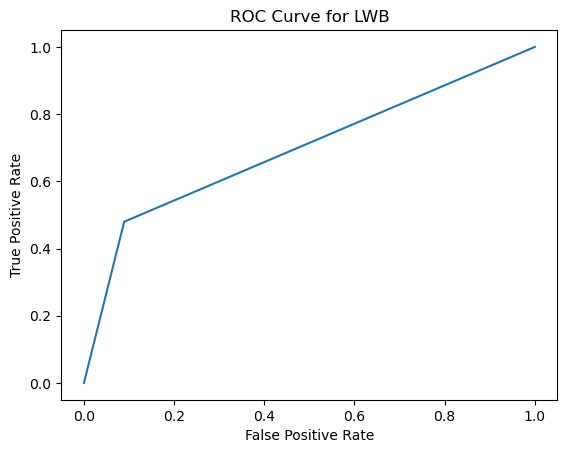


=== Training model for LW ===
Selected Features for LW: ['PCA_4', 'PCA_7', 'PCA_6', 'PCA_5', 'PCA_2', 'PCA_1', 'PCA_3']
Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(


[RandomForest] AUC for LW: 0.7547376159004696
Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:09:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[XGBoost] AUC for LW: 0.7736499372386388
 XGBoost selected for LW
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      3517
           1       0.23      0.68      0.34       205

    accuracy                           0.85      3722
   macro avg       0.60      0.77      0.63      3722
weighted avg       0.94      0.85      0.89      3722

Confusion Matrix:
 [[3040  477]
 [  65  140]]

Feature importances for LW:
   Feature  Importance
4   PCA_2    0.316130
5   PCA_1    0.242495
6   PCA_3    0.121929
3   PCA_5    0.089331
0   PCA_4    0.081771
1   PCA_7    0.077096
2   PCA_6    0.071248


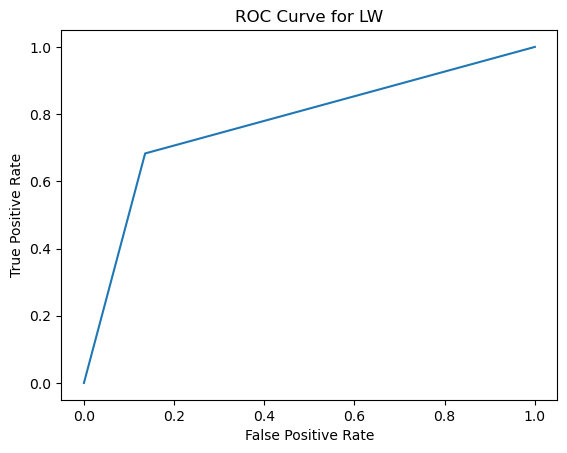


=== Training model for LM ===
Selected Features for LM: ['PCA_8', 'PCA_7', 'PCA_5', 'PCA_11', 'PCA_6', 'PCA_1', 'PCA_13', 'PCA_2', 'PCA_3']
Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(


[RandomForest] AUC for LM: 0.6960303995136875
Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:10:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[XGBoost] AUC for LM: 0.7066099385133586
 XGBoost selected for LM
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      3224
           1       0.33      0.60      0.43       498

    accuracy                           0.79      3722
   macro avg       0.63      0.71      0.65      3722
weighted avg       0.85      0.79      0.81      3722

Confusion Matrix:
 [[2627  597]
 [ 200  298]]

Feature importances for LM:
   Feature  Importance
5   PCA_1    0.243626
7   PCA_2    0.215501
1   PCA_7    0.099961
8   PCA_3    0.096571
2   PCA_5    0.086419
3  PCA_11    0.071746
6  PCA_13    0.067060
4   PCA_6    0.063000
0   PCA_8    0.056116


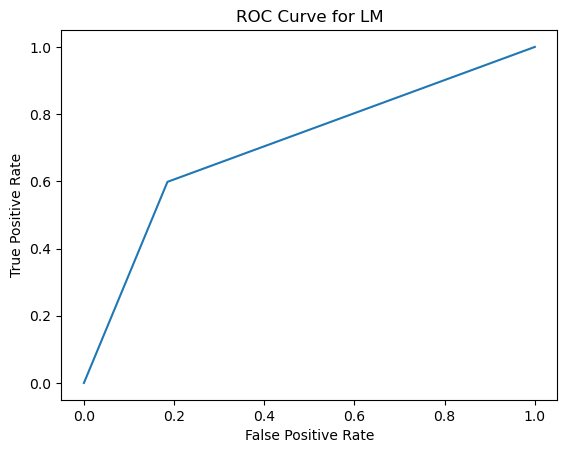


=== Training model for LB ===
Selected Features for LB: ['PCA_4', 'PCA_7', 'PCA_5', 'PCA_11', 'PCA_12', 'PCA_6', 'PCA_1', 'PCA_13', 'PCA_2', 'PCA_3']
Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=14. There will be no feature selection and all features will be kept.
  warnings.warn(


[RandomForest] AUC for LB: 0.791274974262627
Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:10:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[XGBoost] AUC for LB: 0.7896379947451456
 RandomForest selected for LB
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      3321
           1       0.46      0.68      0.55       401

    accuracy                           0.88      3722
   macro avg       0.71      0.79      0.74      3722
weighted avg       0.91      0.88      0.89      3722

Confusion Matrix:
 [[3003  318]
 [ 129  272]]

Feature importances for LB:
   Feature  Importance
8   PCA_2    0.233425
9   PCA_3    0.167627
1   PCA_7    0.107207
3  PCA_11    0.095985
6   PCA_1    0.083916
2   PCA_5    0.080121
0   PCA_4    0.075821
7  PCA_13    0.058644
4  PCA_12    0.053598
5   PCA_6    0.043655


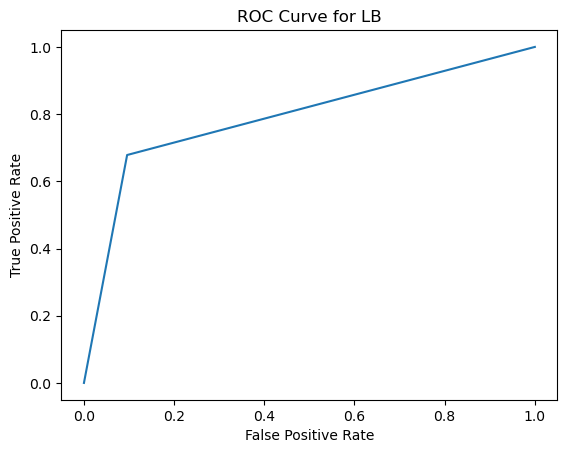


=== Training model for GK ===
Selected Features for GK: ['PCA_4', 'PCA_8', 'PCA_7', 'PCA_5', 'PCA_2', 'PCA_1', 'PCA_3']
Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=8. There will be no feature selection and all features will be kept.
  warnings.warn(


[RandomForest] AUC for GK: 1.0
Fitting 3 folds for each of 4 candidates, totalling 12 fits
[XGBoost] AUC for GK: 1.0
 RandomForest selected for GK
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3300
           1       1.00      1.00      1.00       422

    accuracy                           1.00      3722
   macro avg       1.00      1.00      1.00      3722
weighted avg       1.00      1.00      1.00      3722

Confusion Matrix:
 [[3300    0]
 [   0  422]]

Feature importances for GK:
   Feature  Importance
5   PCA_1    0.777207
6   PCA_3    0.070701
4   PCA_2    0.054623
0   PCA_4    0.052464
3   PCA_5    0.036381
1   PCA_8    0.006615
2   PCA_7    0.002008


C:\Users\tyrel\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:11:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


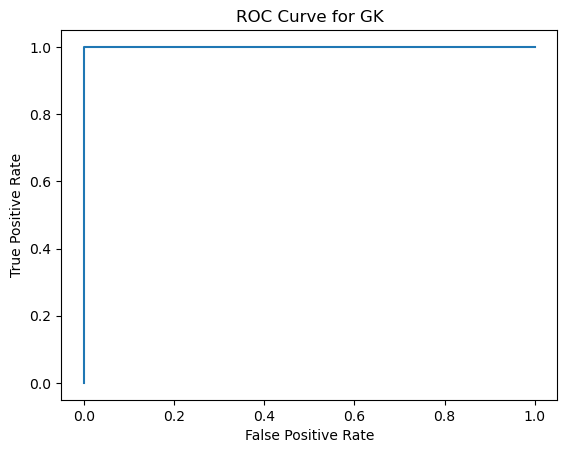


=== Training model for CM ===
Selected Features for CM: ['PCA_4', 'PCA_8', 'PCA_10', 'PCA_7', 'PCA_5', 'PCA_11', 'PCA_12', 'PCA_6', 'PCA_1', 'PCA_13', 'PCA_2', 'PCA_3']
Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(


[RandomForest] AUC for CM: 0.8694090014600393
Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:11:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[XGBoost] AUC for CM: 0.8778522344950168
 XGBoost selected for CM
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      2832
           1       0.73      0.85      0.79       890

    accuracy                           0.89      3722
   macro avg       0.84      0.88      0.86      3722
weighted avg       0.90      0.89      0.89      3722

Confusion Matrix:
 [[2557  275]
 [ 131  759]]

Feature importances for CM:
    Feature  Importance
0    PCA_4    0.265062
8    PCA_1    0.177926
3    PCA_7    0.084543
4    PCA_5    0.074905
1    PCA_8    0.074220
10   PCA_2    0.063362
11   PCA_3    0.056511
6   PCA_12    0.050105
9   PCA_13    0.045318
2   PCA_10    0.043773
5   PCA_11    0.032363
7    PCA_6    0.031912


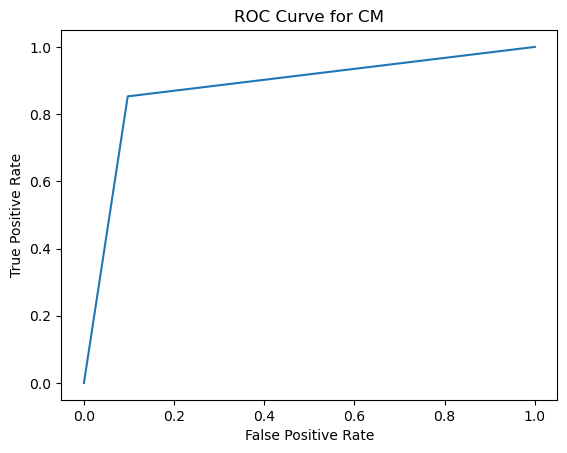


=== Training model for CF ===
Selected Features for CF: ['PCA_4', 'PCA_6', 'PCA_5', 'PCA_2', 'PCA_1', 'PCA_3']
Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(


[RandomForest] AUC for CF: 0.6018022724304557
Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:12:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[XGBoost] AUC for CF: 0.6208857545020533
 XGBoost selected for CF
              precision    recall  f1-score   support

           0       0.98      0.89      0.94      3627
           1       0.08      0.35      0.13        95

    accuracy                           0.88      3722
   macro avg       0.53      0.62      0.53      3722
weighted avg       0.96      0.88      0.92      3722

Confusion Matrix:
 [[3244  383]
 [  62   33]]

Feature importances for CF:
   Feature  Importance
4   PCA_1    0.328068
3   PCA_2    0.245432
5   PCA_3    0.143631
0   PCA_4    0.099747
2   PCA_5    0.092664
1   PCA_6    0.090457


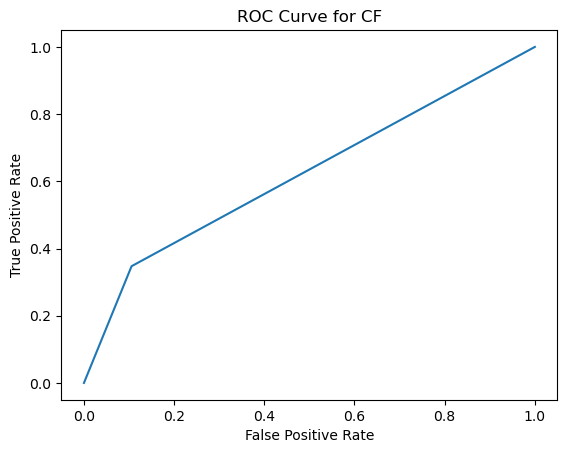


=== Training model for CDM ===
Selected Features for CDM: ['PCA_9', 'PCA_4', 'PCA_8', 'PCA_10', 'PCA_7', 'PCA_5', 'PCA_11', 'PCA_12', 'PCA_2', 'PCA_1', 'PCA_13', 'PCA_3']
Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(


[RandomForest] AUC for CDM: 0.8412092171989984
Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:13:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[XGBoost] AUC for CDM: 0.8326364086986363
 RandomForest selected for CDM
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3116
           1       0.63      0.77      0.69       606

    accuracy                           0.89      3722
   macro avg       0.79      0.84      0.81      3722
weighted avg       0.90      0.89      0.89      3722

Confusion Matrix:
 [[2836  280]
 [ 138  468]]

Feature importances for CDM:
    Feature  Importance
8    PCA_2    0.197542
1    PCA_4    0.160723
9    PCA_1    0.127542
4    PCA_7    0.096119
11   PCA_3    0.091505
5    PCA_5    0.070231
2    PCA_8    0.057316
3   PCA_10    0.049337
7   PCA_12    0.044167
10  PCA_13    0.038327
6   PCA_11    0.036894
0    PCA_9    0.030297


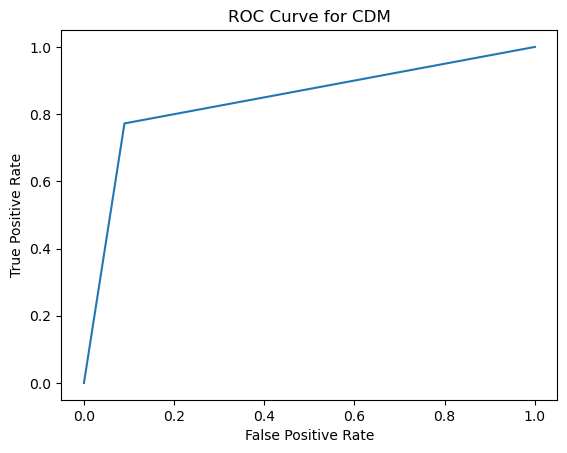


=== Training model for CB ===
Selected Features for CB: ['PCA_9', 'PCA_4', 'PCA_8', 'PCA_7', 'PCA_11', 'PCA_2', 'PCA_1', 'PCA_13', 'PCA_3']
Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(


[RandomForest] AUC for CB: 0.920380421474458
Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:13:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[XGBoost] AUC for CB: 0.9171660239717057
 RandomForest selected for CB
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2917
           1       0.83      0.89      0.86       805

    accuracy                           0.94      3722
   macro avg       0.90      0.92      0.91      3722
weighted avg       0.94      0.94      0.94      3722

Confusion Matrix:
 [[2775  142]
 [  89  716]]

Feature importances for CB:
   Feature  Importance
5   PCA_2    0.627933
6   PCA_1    0.122052
1   PCA_4    0.072541
8   PCA_3    0.048742
2   PCA_8    0.030924
0   PCA_9    0.026012
3   PCA_7    0.024530
7  PCA_13    0.023880
4  PCA_11    0.023387


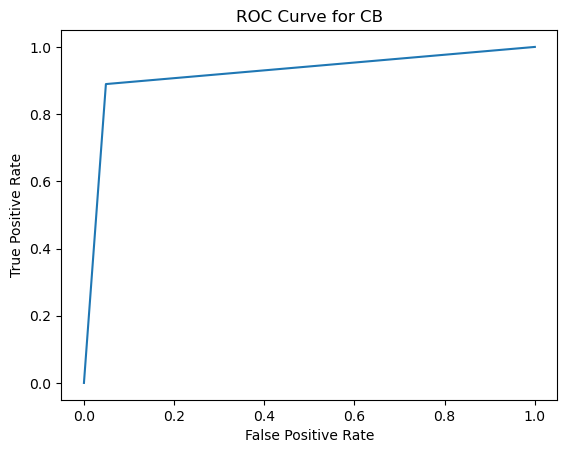


=== Training model for CAM ===
Selected Features for CAM: ['PCA_9', 'PCA_4', 'PCA_8', 'PCA_10', 'PCA_5', 'PCA_12', 'PCA_6', 'PCA_1', 'PCA_2', 'PCA_3']
Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=15 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(


[RandomForest] AUC for CAM: 0.7816480591981535
Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\tyrel\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:14:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[XGBoost] AUC for CAM: 0.7887007320760884
 XGBoost selected for CAM
              precision    recall  f1-score   support

           0       0.96      0.86      0.90      3269
           1       0.41      0.72      0.52       453

    accuracy                           0.84      3722
   macro avg       0.68      0.79      0.71      3722
weighted avg       0.89      0.84      0.86      3722

Confusion Matrix:
 [[2804  465]
 [ 127  326]]

Feature importances for CAM:
   Feature  Importance
7   PCA_1    0.210024
8   PCA_2    0.174349
9   PCA_3    0.152980
1   PCA_4    0.120668
4   PCA_5    0.071616
3  PCA_10    0.060987
6   PCA_6    0.057941
0   PCA_9    0.052580
5  PCA_12    0.049643
2   PCA_8    0.049213


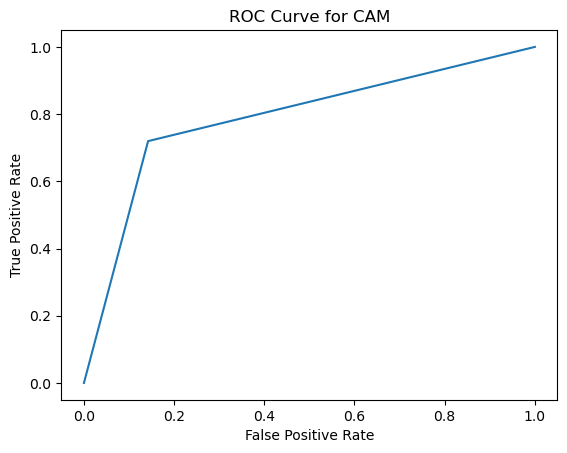

In [36]:

numerical_cols = [
    "height_cm", "weight_kg", "crossing", "finishing", "heading_accuracy", "short_passing", "volleys",
    "dribbling", "curve", "fk_accuracy", "long_passing", "ball_control", "acceleration", "sprint_speed",
    "agility", "reactions", "balance", "shot_power", "jumping", "stamina", "strength", "long_shots",
    "aggression", "interceptions", "positioning", "vision", "penalties", "composure", "defensive_awareness",
    "standing_tackle", "sliding_tackle", "gk_diving", "gk_handling", "gk_kicking", "gk_positioning",
    "gk_reflexes", "age", "speed_strength_ratio", "agility_height_ratio", "jumping_height_ratio",
    "stamina_weight_ratio", "offensive_skills", "defensive_skills", "playmaking_skills", "physical_dominance",
    "technical_ability", "speed_composite", "goalkeeper_skills", "offensive_defensive_diff",
    "offensive_defensive_ratio", "technical_physical_ratio", "pressure_handling"
]

inputs = df[numerical_cols]
positions = ["ST", "RWB", "RW", "RM", "RB", "LWB", "LW", "LM", "LB", "GK", "CM", "CF", "CDM", "CB", "CAM"]

models_dict_RF_XGB = {}
selected_features_dict_RF_XGB = {}
pca_dict_RF_XGB = {}

for pos in positions:
    print(f"\n=== Training model for {pos} ===")
    target = df[pos]
    X = inputs.values
    y = target.values

    #Sclaing the all of the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    #Split the data into a traina nd test set, with the same seed to have a comparable output to see changes.
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    #balancing data
    sm = SMOTE(random_state=2)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

    
    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train_res)
    X_test_pca = pca.transform(X_test)
    pca_dict_RF_XGB[pos] = pca

    # RFE -Done to get the most relevant features
    log_reg_rfe = LogisticRegression(class_weight='balanced', random_state=2, max_iter=1000)
    rfe = RFE(estimator=log_reg_rfe, n_features_to_select=15)
    X_train_rfe = rfe.fit_transform(X_train_pca, y_train_res)

    # LASSO -Done to get the most relevant features
    lasso = Lasso(alpha=0.01)
    lasso.fit(X_train_pca, y_train_res)
    lasso_importance = np.abs(lasso.coef_)
    selected_features_lasso = np.array([f'PCA_{i+1}' for i in range(len(lasso_importance)) if lasso_importance[i] > 0])

    # Combine RFE and LASSO selected features so we only choose the iones which intersect
    final_selected_features = list(set([f'PCA_{i+1}' for i in range(X_train_rfe.shape[1])]) & set(selected_features_lasso))
    print(f"Selected Features for {pos}: {final_selected_features}")
    selected_features_dict_RF_XGB[pos] = final_selected_features

    selected_indices = [int(f.split('_')[1]) - 1 for f in final_selected_features]
    X_train_final = X_train_pca[:, selected_indices]
    X_test_final = X_test_pca[:, selected_indices]

    #  Random Forest ===========================================================
    rf = RandomForestClassifier(class_weight='balanced', random_state=2)
    rf_params = {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5]
    }
    rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
    rf_grid.fit(X_train_final, y_train_res)
    best_rf = rf_grid.best_estimator_
    rf_pred = best_rf.predict(X_test_final)
    rf_auc = roc_auc_score(y_test, rf_pred)
    print(f"[RandomForest] AUC for {pos}: {rf_auc}")

    # XGBoost =============================================================================
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2)
    xgb_params = {
        'n_estimators': [100],
        'max_depth': [3, 6],
        'learning_rate': [0.1, 0.3],
        'subsample': [0.8]
    }
    xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
    xgb_grid.fit(X_train_final, y_train_res)
    best_xgb = xgb_grid.best_estimator_
    xgb_pred = best_xgb.predict(X_test_final)
    xgb_auc = roc_auc_score(y_test, xgb_pred)
    print(f"[XGBoost] AUC for {pos}: {xgb_auc}")

    if xgb_auc > rf_auc:
        print(f" XGBoost selected for {pos}")
        models_dict_RF_XGB[pos] = best_xgb
        best_pred = xgb_pred
    else:
        print(f" RandomForest selected for {pos}")
        models_dict_RF_XGB[pos] = best_rf
        best_pred = rf_pred

    print(classification_report(y_test, best_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, best_pred))

    # Feature importances from the selected model
    if hasattr(models_dict_RF_XGB[pos], 'feature_importances_'):
        importances = models_dict_RF_XGB[pos].feature_importances_
        feature_names = final_selected_features
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)
        print(f"\nFeature importances for {pos}:\n", importance_df)


    fpr_lr, tpr_lr, thresholds = roc_curve(y_test, best_pred)

    plt.plot(fpr_lr, tpr_lr)
    plt.title(f"ROC Curve for {pos}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

# Seeing which original features influence the pca components

In [39]:
original_features = list(df[numerical_cols].columns)


for position, pca in pca_dict_RF_XGB.items():
    print(f"\n Top contributors for position: {position}\n")
    

    explained_variance = pca.explained_variance_ratio_
    

    for i, ev in enumerate(explained_variance):
        print(f"PCA_{i + 1} explains {ev:.2%} of the variance")
    
    print("\n")


    for index in range(pca.components_.shape[0]):
        component_weights = pca.components_[index]
        

        feature_contributions = pd.Series(component_weights, index=original_features).sort_values(key=np.abs, ascending=False)
        

        print(f"Top contributors to PCA_{index + 1}:")
        print(feature_contributions.head(5))
        print("\n")


 Top contributors for position: ST

PCA_1 explains 45.63% of the variance
PCA_2 explains 18.55% of the variance
PCA_3 explains 13.64% of the variance
PCA_4 explains 6.17% of the variance
PCA_5 explains 3.80% of the variance
PCA_6 explains 1.70% of the variance
PCA_7 explains 1.27% of the variance
PCA_8 explains 1.02% of the variance
PCA_9 explains 0.88% of the variance
PCA_10 explains 0.78% of the variance
PCA_11 explains 0.71% of the variance
PCA_12 explains 0.64% of the variance
PCA_13 explains 0.51% of the variance


Top contributors to PCA_1:
technical_ability    0.186412
offensive_skills     0.183822
ball_control         0.182456
positioning          0.181586
dribbling            0.181110
dtype: float64


Top contributors to PCA_2:
offensive_defensive_ratio    0.388844
offensive_defensive_diff     0.350816
sliding_tackle              -0.314755
defensive_skills            -0.314366
standing_tackle             -0.311574
dtype: float64


Top contributors to PCA_3:
strength          

## Count of players by position to see if it correlates with the poor performance scores

In [22]:
positions = ["ST", "RWB", "RW", "RM", "RB", "LWB", "LW", "LM", "LB", "GK", "CM", "CF", "CDM", "CB", "CAM"]
for pos in positions:
    print(f'The count for {pos} is: {df[df[pos] == 1].shape[0]}')

The count for ST is: 3310
The count for RWB is: 694
The count for RW is: 1089
The count for RM is: 2505
The count for RB is: 2031
The count for LWB is: 688
The count for LW is: 1138
The count for LM is: 2516
The count for LB is: 1897
The count for GK is: 2068
The count for CM is: 4254
The count for CF is: 498
The count for CDM is: 2892
The count for CB is: 4036
The count for CAM is: 2168


# Testing Prediction before implementing into flask app

When looking at the prediction results, although the logistic regression has better performance metrics, the positions predicted did not align wiht the ones for the given player.

This player which we used is a RB, CM, RM. This may be an oversight on our part, in which this player may have stats which support them being better suited towards only midfield postions, however from our data set, they should be RB, CM, RM whcih is what our XGBoost and Random forest model predicted.

In [56]:
combined_dict = {}
combined_dict_RF_XGB = {}


for pos in models_dict.keys():
    combined_dict[pos] = {
        'model': models_dict[pos],                    
        'selected_features': selected_features_dict[pos],  
        'pca': pca_dict.get(pos, None)                 
    }

for pos in models_dict_RF_XGB.keys():
    combined_dict_RF_XGB[pos] = {
        'model': models_dict_RF_XGB[pos],                    
        'selected_features': selected_features_dict_RF_XGB[pos],  
        'pca': pca_dict_RF_XGB.get(pos, None)                 
    }



test_player_data = {
    "height_cm": 170,
    "weight_kg": 66,
    "crossing": 60,
    "finishing": 55,
    "heading_accuracy": 42,
    "short_passing": 72,
    "volleys": 33,
    "dribbling": 72,
    "curve": 55,
    "fk_accuracy": 38,
    "long_passing": 70,
    "ball_control": 60,
    "acceleration": 77,
    "sprint_speed":77,
    "agility": 67,
    "reactions": 55,
    "balance": 80,
    "shot_power": 40,
    "jumping": 58,
    "stamina": 80,
    "strength": 55,
    "long_shots": 40,
    "aggression": 60,
    "interceptions": 66,
    "positioning": 55,
    "vision": 61,
    "penalties": 48,
    "composure": 58,
    "defensive_awareness": 63,
    "standing_tackle": 66,
    "sliding_tackle": 61,
    "gk_diving": 13,
    "gk_handling": 12,
    "gk_kicking": 15,
    "gk_positioning": 8,
    "gk_reflexes": 13,
    "age": 26,
}






test_player_df = pd.DataFrame([test_player_data])

test_player_df = create_derived_features(test_player_df)

test_player_scaled = scaler.transform(test_player_df)  
test_player_scaled_df = pd.DataFrame(test_player_scaled, columns=test_player_df.columns)


predictions = {}
predictions_RF_XGB = {}

print("Done Using the RF/XGBOOST MODELS:")
print("========================================================================")
print("\n")

for pos, pos_data in combined_dict_RF_XGB.items():
    model = pos_data['model']
    selected_features = pos_data['selected_features']
    pca = pos_data['pca']

    print(f"Position: {pos}")
    
    
    if pca is not None:
        test_player_pca = pca.transform(test_player_scaled)  
        pca_feature_names = [f'PCA_{i+1}' for i in range(test_player_pca.shape[1])]
        
        test_player_pca_df = pd.DataFrame(test_player_pca, columns=pca_feature_names)

        test_player_data_input = test_player_pca_df[selected_features]
    else:
        test_player_data_input = test_player_scaled_df[selected_features]


    prediction_prob_RF_XGB = model.predict_proba(test_player_data_input)[0][1] 
    print(f"Probability for {pos}: {prediction_prob_RF_XGB:.4f}")

    predictions_RF_XGB[pos] = prediction_prob_RF_XGB


sorted_predictions_RF_XGB = sorted(predictions_RF_XGB.items(), key=lambda x: x[1], reverse=True)


print("\nRanked Position Predictions for the Test Player:")
for pos, prob in sorted_predictions_RF_XGB:
    print(f"{pos}: {prob:.4f}")

most_likely_position_RF_XGB = sorted_predictions_RF_XGB[0][0]
print(f"\nMost Likely Position: {most_likely_position_RF_XGB}")

print("========================================================================")
print("\n")

print("Done Using the Logistic Regression MODELS:")
print("========================================================================")
print("\n")

for pos, pos_data in combined_dict.items():
    model = pos_data['model']
    selected_features = pos_data['selected_features']
    pca = pos_data['pca']

    print(f"Position: {pos}")
    
    
    if pca is not None:
        test_player_pca = pca.transform(test_player_scaled)  
        pca_feature_names = [f'PCA_{i+1}' for i in range(test_player_pca.shape[1])]
        
        test_player_pca_df = pd.DataFrame(test_player_pca, columns=pca_feature_names)

        test_player_data_input = test_player_pca_df[selected_features]
    else:
        test_player_data_input = test_player_scaled_df[selected_features]


    prediction_prob = model.predict_proba(test_player_data_input)[0][1] 
    print(f"Probability for {pos}: {prediction_prob:.4f}")

    predictions[pos] = prediction_prob


sorted_predictions = sorted(predictions.items(), key=lambda x: x[1], reverse=True)


print("\nRanked Position Predictions for the Test Player:")
for pos, prob in sorted_predictions:
    print(f"{pos}: {prob:.4f}")

most_likely_position = sorted_predictions[0][0]
print(f"\nMost Likely Position: {most_likely_position}")

print("========================================================================")
print("\n")

Done Using the RF/XGBOOST MODELS:


Position: ST
Probability for ST: 0.0001
Position: RWB
Probability for RWB: 0.0773
Position: RW
Probability for RW: 0.0033
Position: RM
Probability for RM: 0.8550
Position: RB
Probability for RB: 0.9471
Position: LWB
Probability for LWB: 0.3382
Position: LW
Probability for LW: 0.0073
Position: LM
Probability for LM: 0.2606
Position: LB
Probability for LB: 0.2300
Position: GK
Probability for GK: 0.1051
Position: CM
Probability for CM: 0.8936
Position: CF
Probability for CF: 0.0001
Position: CDM
Probability for CDM: 0.2000
Position: CB
Probability for CB: 0.0100
Position: CAM
Probability for CAM: 0.0061

Ranked Position Predictions for the Test Player:
RB: 0.9471
CM: 0.8936
RM: 0.8550
LWB: 0.3382
LM: 0.2606
LB: 0.2300
CDM: 0.2000
GK: 0.1051
RWB: 0.0773
CB: 0.0100
LW: 0.0073
CAM: 0.0061
RW: 0.0033
CF: 0.0001
ST: 0.0001

Most Likely Position: RB


Done Using the Logistic Regression MODELS:


Position: ST
Probability for ST: 0.0016
Position: RWB
Probabilit

C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitt

# Similar player by Attribute values

In [59]:
from sklearn.metrics.pairwise import euclidean_distances

# Use the same most likely position from what we predicted before hand.
most_likely_position = sorted_predictions_RF_XGB[0][0]
selected_features = combined_dict_RF_XGB[most_likely_position]['selected_features']
pca = combined_dict_RF_XGB[most_likely_position]['pca']

numerical_cols = [
    "height_cm",
    "weight_kg",
    "crossing",
    "finishing",
    "heading_accuracy",
    "short_passing",
    "volleys",
    "dribbling",
    "curve",
    "fk_accuracy",
    "long_passing",
    "ball_control",
    "acceleration",
    "sprint_speed",
    "agility",
    "reactions",
    "balance",
    "shot_power",
    "jumping",
    "stamina",
    "strength",
    "long_shots",
    "aggression",
    "interceptions",
    "positioning",
    "vision",
    "penalties",
    "composure",
    "defensive_awareness",
    "standing_tackle",
    "sliding_tackle",
    "gk_diving",
    "gk_handling",
    "gk_kicking",
    "gk_positioning",
    "gk_reflexes",
    "age",
    "speed_strength_ratio",
    "agility_height_ratio",
    "jumping_height_ratio",
    "stamina_weight_ratio",
    "offensive_skills",
    "defensive_skills",
    "playmaking_skills",
    "physical_dominance",
    "technical_ability",
    "speed_composite",
    "goalkeeper_skills",
    "offensive_defensive_diff",
    "offensive_defensive_ratio",
    "technical_physical_ratio",
    "pressure_handling"
]


df_input = df[numerical_cols] 


df_scaled = scaler.transform(df_input) 
df_scaled_df = pd.DataFrame(df_scaled, columns=numerical_cols)  


test_player_input = test_player_df[numerical_cols] 
test_player_scaled = scaler.transform(test_player_input)  
test_player_scaled_df = pd.DataFrame(test_player_scaled, columns=numerical_cols)


if pca is not None:

    df_pca = pca.transform(df_scaled_df)
    df_pca_df = pd.DataFrame(df_pca, columns=[f'PCA_{i+1}' for i in range(df_pca.shape[1])])
    

    selected_features_pca = [f'PCA_{i+1}' for i in range(df_pca.shape[1])]
    df_for_similarity = df_pca_df[selected_features_pca]

    test_player_pca = pca.transform(test_player_scaled_df) 
    test_player_pca_df = pd.DataFrame(test_player_pca, columns=[f'PCA_{i+1}' for i in range(df_pca.shape[1])])
    

    test_vector = test_player_pca_df[selected_features_pca]
else:
    df_for_similarity = df_scaled_df[selected_features]
    test_vector = test_player_scaled_df[selected_features]


distances = euclidean_distances(df_for_similarity, test_vector)
df['similarity_score'] = distances  # Lower distance means more similar


similar_players = df.sort_values(by='similarity_score').head(5)


print(similar_players[['name', 'similarity_score']])


                     name  similarity_score
15     Erik De Los Santos          0.000000
16215     Yhormar Hurtado          1.796929
12579     Keigo Tsunemoto          1.808124
13636        Philipp Treu          1.817093
6716      Mateo Hernández          1.833507


C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\tyrel\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [62]:
def get_position_groups(player):
    groups = set()

    if player['GK'] == 1:
        groups.add('goalkeeper')

    if any(player[pos] == 1 for pos in ['CB', 'LB', 'RB', 'LWB', 'RWB']):
        groups.add('defender')

    if any(player[pos] == 1 for pos in ['CM', 'CDM', 'CAM', 'LM', 'RM']):
        groups.add('midfielder')

    if any(player[pos] == 1 for pos in ['ST', 'CF', 'RW', 'LW']):
        groups.add('attacker')

    return list(groups)

df['position_groups'] = df.apply(get_position_groups, axis=1)
df[['name', 'position_groups']].head(50)

,name,position_groups
0,Rúben Fernandes,[defender]
1,Glenn Morris,[goalkeeper]
2,Cristiano Ronaldo,[attacker]
3,Andreas Johansson,[defender]
4,Pepe Reina,[goalkeeper]
5,Roque Santa Cruz,[attacker]
6,Ludovic Butelle,[goalkeeper]
7,Joe Murphy,[goalkeeper]
8,Craig Gordon,[goalkeeper]
9,Manuel Cedeño,[midfielder]


# Saving the models for use in flask app

In [ ]:
import joblib
import os


os.makedirs("saved_models", exist_ok=True)


for pos in combined_dict:
    joblib.dump(combined_dict_RF_XGB[pos]['model'], f"saved_models/{pos}_model_RF_XGB.pkl")
    joblib.dump(combined_dict_RF_XGB[pos]['pca'], f"saved_models/{pos}_pca_RF_XGB.pkl")
    joblib.dump(combined_dict_RF_XGB[pos]['selected_features'], f"saved_models/{pos}_features_RF_XGB.pkl")


joblib.dump(scaler, "saved_models/scaler_RF_XGB.pkl")